# NFL Time Prediction Analysis
### Author: Fiorella Abarca
### Purpose: Predict MinutesElapsed_target using various machine learning models

# 1. Import libraries

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from math import sqrt

# Scikit-learn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge, LinearRegression
from sklearn.metrics import (mean_squared_error, mean_absolute_error, 
                           explained_variance_score, r2_score)

# Machine Learning Models
from xgboost import XGBRegressor

# Deep Learning
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

# 2. Data loading and initial exploration

In [91]:
df = pd.read_csv('nfl_train.csv')

In [92]:
df.head(10)

,custom_index,DataSet,MarginOffense,Down,MinutesRemHalf,Half,ScoreType,YardsToFirstDown,YardsToTD,ScoreType.1,MinutesElapsed_target
0,1,Train,0.0,1.0,29.916667,1,6,10,76.0,6,2.172989
1,2,Train,0.0,2.0,29.416667,1,6,1,67.0,6,1.672989
2,3,Train,0.0,1.0,28.966667,1,6,10,63.0,6,1.222989
3,4,Train,0.0,2.0,28.416667,1,6,4,57.0,6,0.672989
4,5,Train,0.0,3.0,27.850000,1,6,12,65.0,6,0.106323
5,6,Train,0.0,1.0,27.283333,1,6,10,49.0,6,-0.460344
6,7,Train,0.0,1.0,26.483333,1,6,10,13.0,6,-1.260344
7,8,Train,0.0,2.0,25.850000,1,6,9,12.0,6,-1.893677
8,9,Train,0.0,3.0,25.200000,1,6,4,7.0,6,-2.543677
9,10,Train,-7.0,1.0,25.133333,1,0,10,80.0,0,-1.960344


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350628 entries, 0 to 350627
Data columns (total 11 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   custom_index           350628 non-null  int64  
 1   DataSet                350628 non-null  object 
 2   MarginOffense          350628 non-null  float64
 3   Down                   350628 non-null  float64
 4   MinutesRemHalf         350628 non-null  float64
 5   Half                   350628 non-null  int64  
 6   ScoreType              350628 non-null  int64  
 7   YardsToFirstDown       350628 non-null  int64  
 8   YardsToTD              350628 non-null  float64
 9   ScoreType.1            350628 non-null  int64  
 10  MinutesElapsed_target  350628 non-null  float64
dtypes: float64(5), int64(5), object(1)
memory usage: 29.4+ MB


In [94]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
custom_index,350628.0,201923.123829,116887.934086,1.000000,100817.750000,201524.500000,302111.250000,405656.000000
MarginOffense,350628.0,-1.456233,10.721355,-56.000000,-7.000000,0.000000,4.000000,55.000000
Down,350628.0,1.860918,0.887092,1.000000,1.000000,2.000000,2.000000,4.000000
MinutesRemHalf,350628.0,14.906113,8.672593,0.216667,7.300000,15.000000,22.400000,30.000000
Half,350628.0,1.515084,0.513914,1.000000,1.000000,2.000000,2.000000,3.000000
ScoreType,350628.0,2.363890,2.580727,0.000000,0.000000,3.000000,6.000000,6.000000
YardsToFirstDown,350628.0,8.550897,3.979246,1.000000,6.000000,10.000000,10.000000,48.000000
YardsToTD,350628.0,51.065645,24.989179,1.000000,31.000000,55.000000,73.000000,99.000000
ScoreType.1,350628.0,2.363890,2.580727,0.000000,0.000000,3.000000,6.000000,6.000000
MinutesElapsed_target,350628.0,-0.702317,1.637969,-2.939094,-1.922685,-1.111851,0.180872,10.354114


In [95]:
df.isnull().sum()

custom_index             0
DataSet                  0
MarginOffense            0
Down                     0
MinutesRemHalf           0
Half                     0
ScoreType                0
YardsToFirstDown         0
YardsToTD                0
ScoreType.1              0
MinutesElapsed_target    0
dtype: int64

# 3. Data cleaning and preprocesing

In [96]:
# Remove irrelevant columns
df.drop(['ScoreType.1', 'DataSet', 'custom_index'], axis=1,inplace=True)

In [97]:
#Analyze correlations with target variable
df.corr(numeric_only=True)['MinutesElapsed_target'].sort_values()

Down                    -0.308850
Half                    -0.021406
YardsToFirstDown         0.037251
MarginOffense            0.044534
ScoreType                0.166684
MinutesRemHalf           0.224786
YardsToTD                0.366747
MinutesElapsed_target    1.000000
Name: MinutesElapsed_target, dtype: float64

In [98]:
#Remove features with low correlation to target
df.drop(['Half','YardsToFirstDown','MarginOffense'],axis=1,inplace=True) 

In [99]:
def detect_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]

print("Outliers in target variable:")
outliers = detect_outliers(df, 'MinutesElapsed_target')
print(f"Number of outliers: {len(outliers)}")

Outliers in target variable:
Number of outliers: 9288


# 4. Exploratory Data Analysis and Visualization

array([[<Axes: title={'center': 'Down'}>,
        <Axes: title={'center': 'MinutesRemHalf'}>],
       [<Axes: title={'center': 'ScoreType'}>,
        <Axes: title={'center': 'YardsToTD'}>],
       [<Axes: title={'center': 'MinutesElapsed_target'}>, <Axes: >]],
      dtype=object)

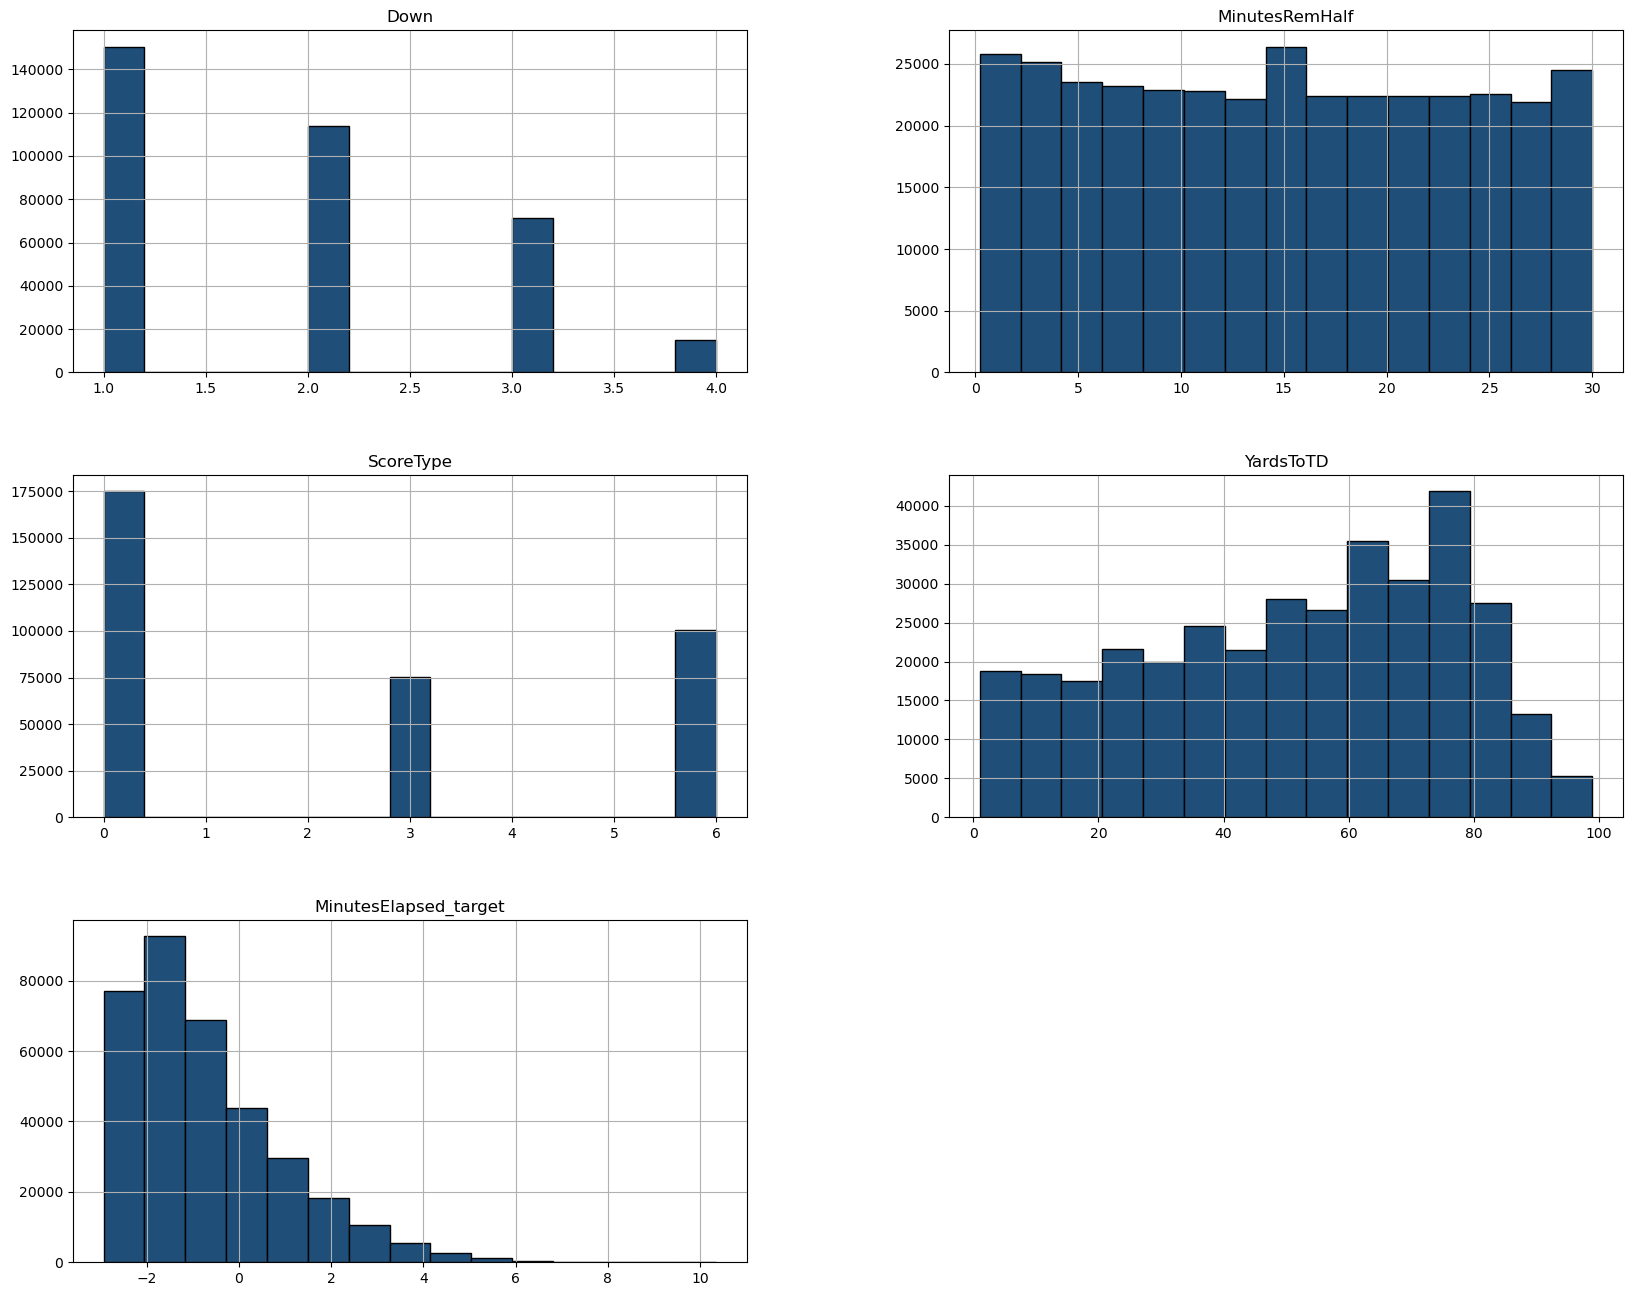

In [100]:
#Create histograms for all numeric columns
df.hist(bins=15, figsize=(20, 16), color='#1F4E79', edgecolor='black')

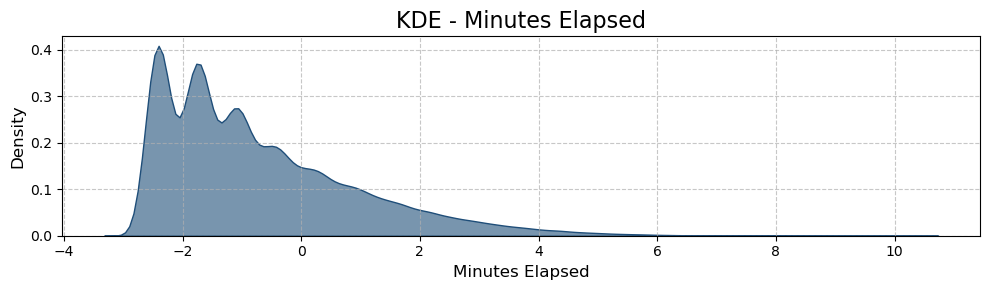

In [101]:
#KDE plot
plt.figure(figsize=(10, 3)) 
sns.kdeplot(df['MinutesElapsed_target'], fill=True, color='#1F4E79', alpha=0.6)
plt.title('KDE - Minutes Elapsed', fontsize=16)
plt.xlabel('Minutes Elapsed', fontsize=12)
plt.ylabel('Density', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

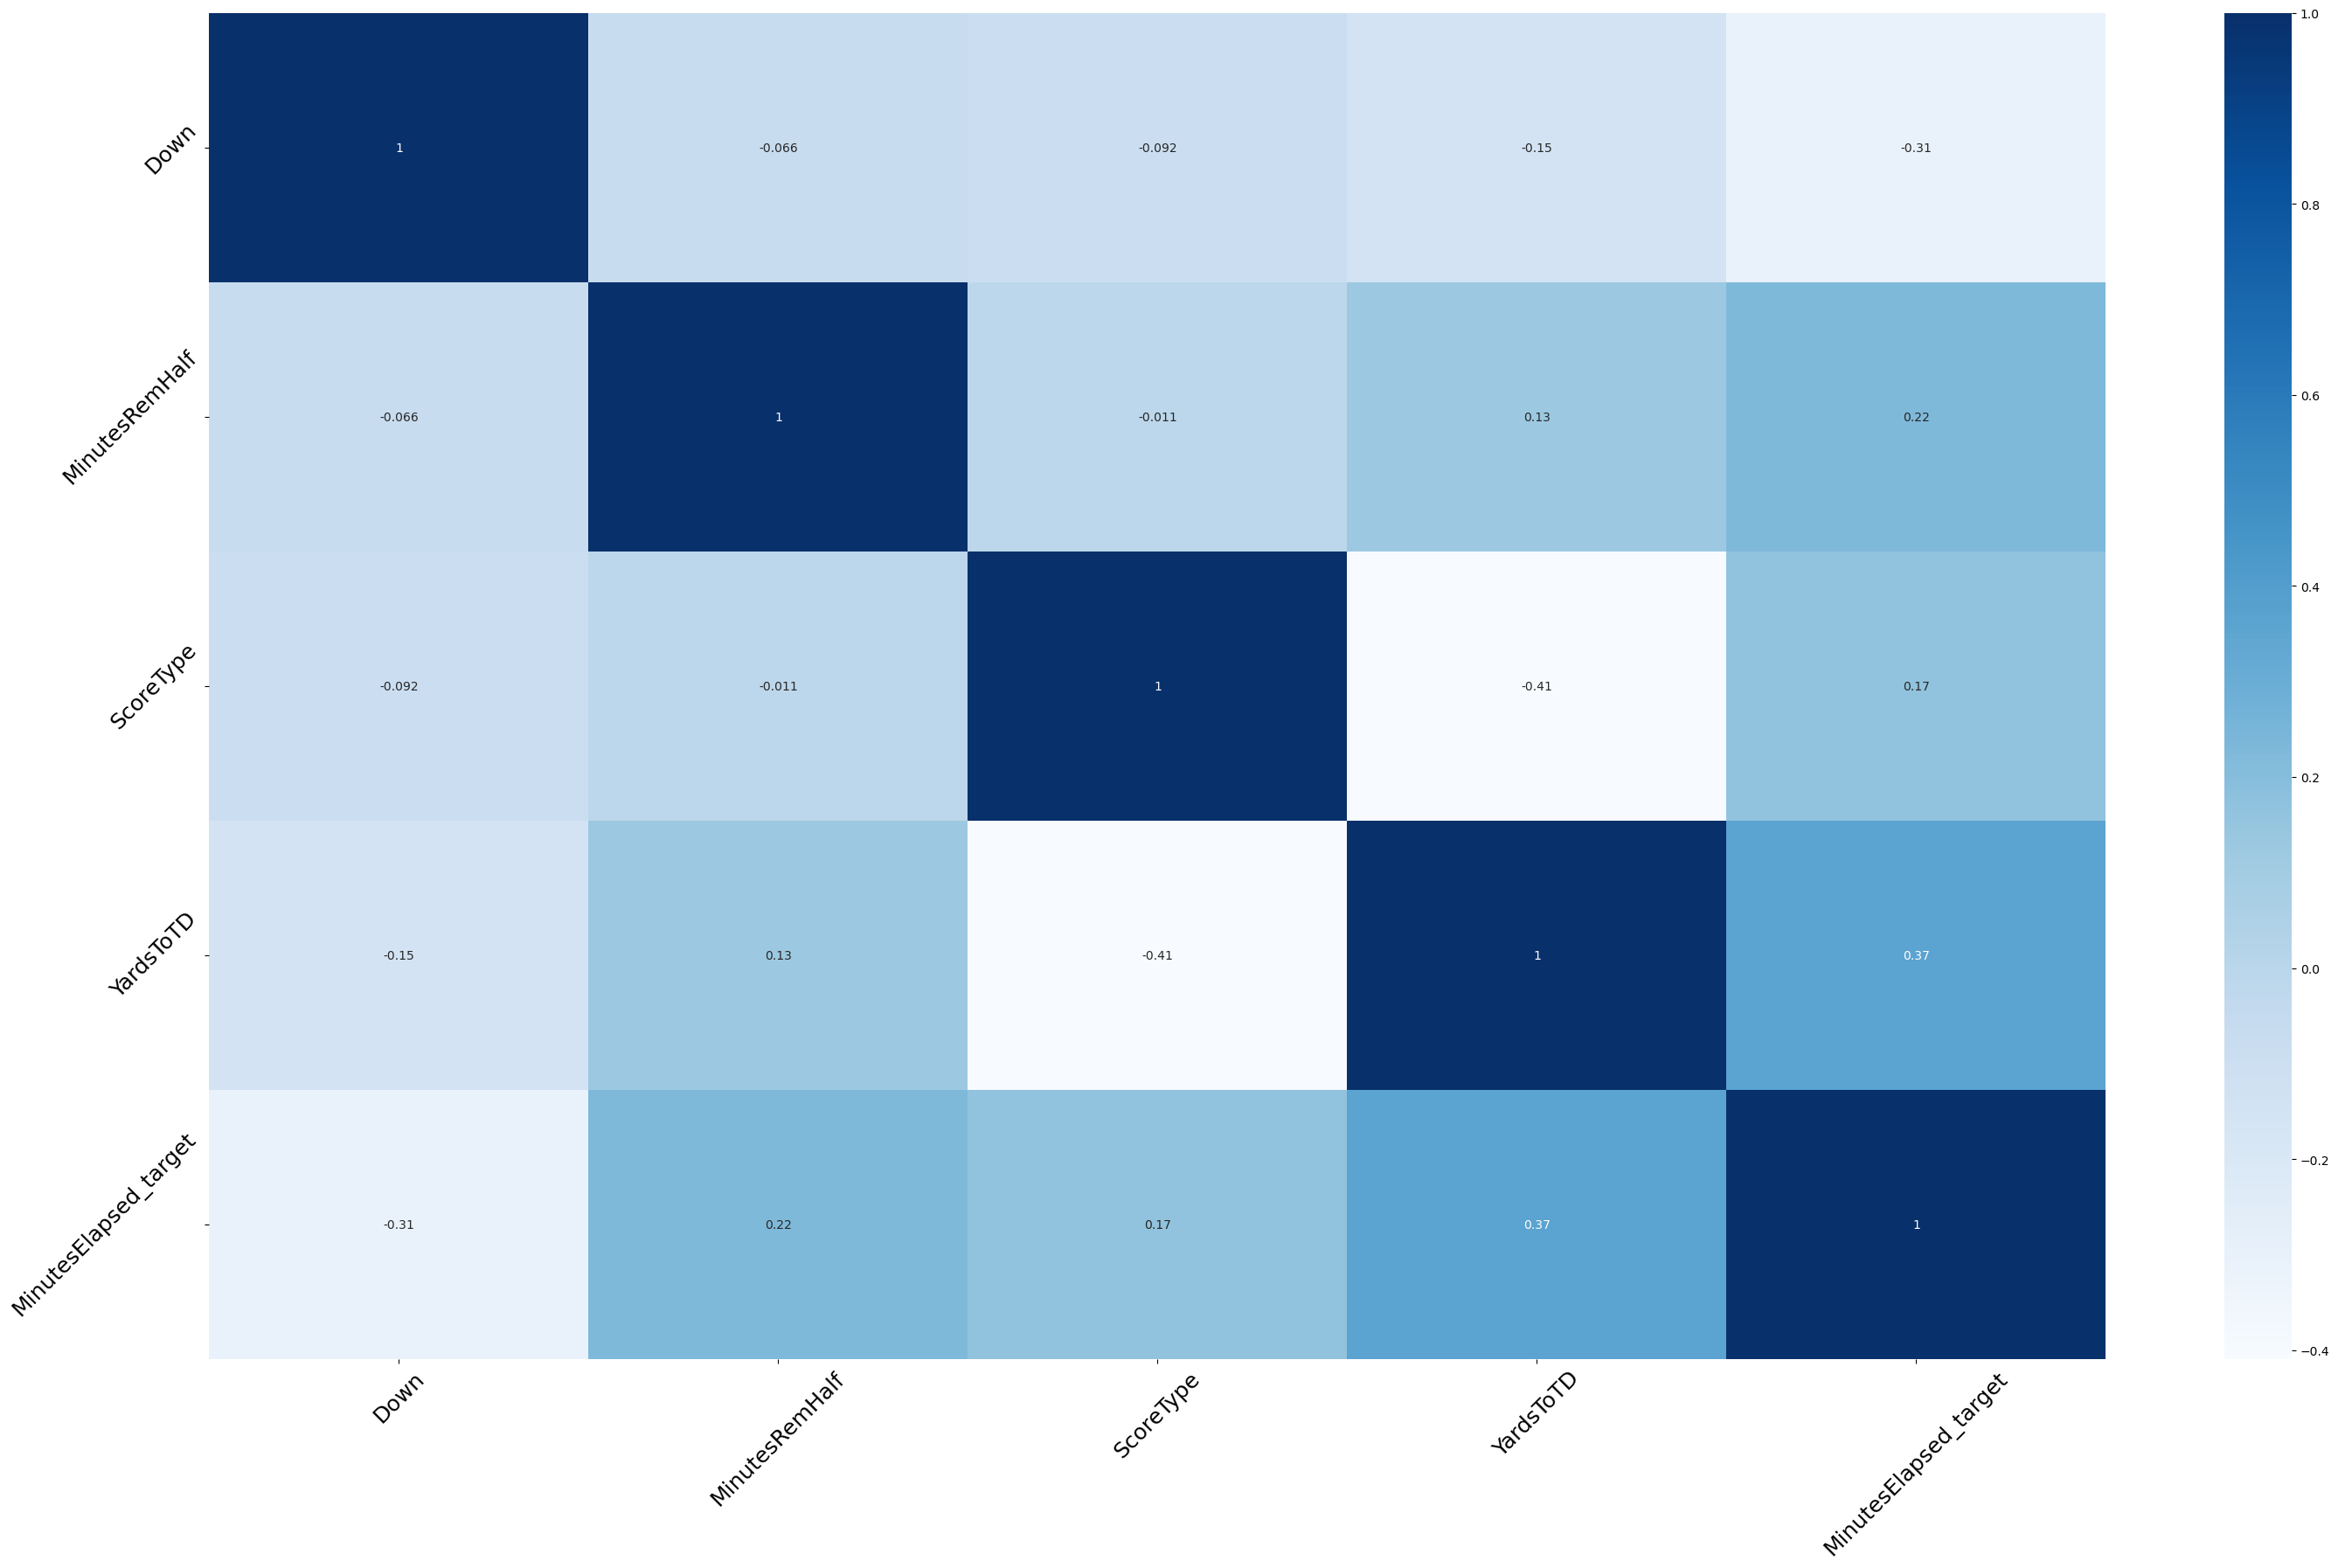

In [102]:
# Correlation heatmap
plt.figure(figsize=(35, 20))
sns.heatmap(df.select_dtypes(include='number').corr(),annot=True,cmap='Blues')
plt.xticks(fontsize=18, rotation=45)
plt.yticks(fontsize=18, rotation=45)
plt.show()

# 5. Model Preparation

In [103]:
#Prepare training and testing datasets
X = df.drop('MinutesElapsed_target', axis=1)
y = df['MinutesElapsed_target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)
print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")

Training set shape: (280502, 4)
Test set shape: (70126, 4)


In [104]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [105]:
X_train

array([[0.33333333, 0.06379407, 0.5       , 0.73469388],
       [0.        , 0.6345831 , 0.        , 0.40816327],
       [0.33333333, 0.806939  , 0.        , 0.74489796],
       ...,
       [0.        , 0.39115837, 1.        , 0.34693878],
       [0.        , 0.30386122, 0.5       , 0.80612245],
       [0.33333333, 0.73531058, 0.        , 0.87755102]])

In [106]:
X_test

array([[0.66666667, 0.6144376 , 0.        , 0.56122449],
       [0.        , 0.63682149, 1.        , 0.45918367],
       [1.        , 0.22160045, 0.5       , 0.16326531],
       ...,
       [0.33333333, 0.31729155, 1.        , 0.17346939],
       [0.33333333, 0.82988248, 1.        , 0.52040816],
       [0.        , 0.36317851, 0.        , 0.60204082]])

# 6. Model Evaluation utilities

In [107]:
def calculate_metrics(y_true, y_pred, target_mean):
    """Calculate comprehensive model metrics"""
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    explained_var = explained_variance_score(y_true, y_pred)
    relative_mae = mae / abs(target_mean) if target_mean != 0 else float('inf')
    
    return {
        'MAE': mae,
        'RMSE': rmse,
        'R²': r2,
        'Explained Variance': explained_var,
        'Relative MAE': relative_mae
    }

def plot_predictions_vs_actual(y_true, y_pred, model_name="Model"):
    """Plot predicted vs actual values"""
    plt.figure(figsize=(10, 6))
    plt.scatter(y_true, y_pred, alpha=0.5)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--', lw=2)
    plt.xlabel('Actual Values')
    plt.ylabel('Predicted Values')
    plt.title(f'{model_name}: Predicted vs Actual Values')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def plot_residuals(y_true, y_pred, model_name="Model"):
    """Plot residuals distribution"""
    residuals = y_true - y_pred
    
    plt.figure(figsize=(10, 6))
    sns.histplot(residuals, kde=True, color='#1F4E79', alpha=0.7)
    plt.axvline(x=0, color='red', linestyle='--', linewidth=2)
    plt.xlabel('Residuals')
    plt.ylabel('Frequency')
    plt.title(f'{model_name}: Residuals Distribution')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

# 7. Neural Network Model

In [108]:
#Build and compile neural network model
model = Sequential()
num_neuronas = X_train.shape[1] #add a number of neurons similar to the numer of features in X_train (4) for this model
model.add(Dense(num_neuronas,activation='relu')) #2 hidden layers 
model.add(Dense(num_neuronas,activation='relu'))
model.add(Dense(1)) # Set as many output neurons as variables to predict — in this case, only 1 variable

model.compile(optimizer='adam',loss='mse') #compile the model using Adam optimizer and MSE as the loss funcition


In [109]:
# Define Early Stopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',          # Monitor validation loss
    patience=50,                 # Number of epochs with no improvement after which training will be stopped
    restore_best_weights=True,   # Restore model weights from the best epoch
    verbose=1                    # Print message when stopping
)

# Train the model with early stopping
history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),  
    epochs=100,                       
    batch_size=128,
    callbacks=[early_stopping],        # Add the early stopping callback
    verbose=1
)

Epoch 1/100
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 2.2939 - val_loss: 1.5169
Epoch 2/100
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.5197 - val_loss: 1.5027
Epoch 3/100
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.4938 - val_loss: 1.5001
Epoch 4/100
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.4930 - val_loss: 1.5017
Epoch 5/100
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.4984 - val_loss: 1.4994
Epoch 6/100
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.4930 - val_loss: 1.5004
Epoch 7/100
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.4965 - val_loss: 1.4968
Epoch 8/100
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.4949 - val_loss: 1.4956
Epoch 9/100
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.4979 - val_loss: 1.4882
Epoch 10/100
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - loss: 1.4918 - val_loss: 1.4866
Epoch 11/100
2192/2192 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - loss: 1.4879 - val_loss: 1.4846
Epoch 12/100
2192/2

In [119]:
losses = pd.DataFrame(history.history)# Create a DataFrame with the model's training and validation losses (loss for training set, val_loss for validation set)
losses

,loss,val_loss
0,1.853348,1.516899
1,1.504175,1.502670
2,1.498680,1.500089
3,1.497178,1.501661
4,1.496086,1.499365
...,...,...
95,1.475251,1.477441
96,1.475231,1.478438
97,1.475191,1.477567
98,1.475349,1.477713


<Axes: >

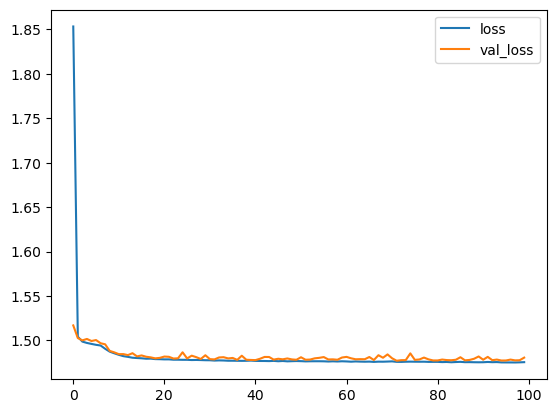

In [120]:
losses.plot()

# 8. Machine Learning Models

In [121]:
# Initialize lists to store metrics
r_2 = []
mse = []
rmse = []
mae = []
model_names = []
trained_models = {}

# Define function to evaluate regression models
def reg(model, model_name):
    model.fit(X_train, y_train)  
    pred = model.predict(X_test)
    
    R2 = r2_score(y_test, pred)
    MSE = mean_squared_error(y_test, pred)
    RMSE = sqrt(mean_squared_error(y_test, pred))
    MAE = mean_absolute_error(y_test, pred)
    
    r_2.append(R2)
    mse.append(MSE)
    rmse.append(RMSE)
    mae.append(MAE)
    model_names.append(model_name)
    trained_models[model_name] = model
    
    return pred
    
# Cross-validation function
def evaluate_with_cv(model, model_name, X, y, cv=5):
    cv_scores = cross_val_score(model, X, y, cv=cv, scoring='neg_mean_absolute_error')
    cv_mae_mean = -cv_scores.mean()
    cv_mae_std = cv_scores.std()
    print(f"{model_name} CV MAE: {cv_mae_mean:.4f} (+/- {cv_mae_std * 2:.4f})")
    return cv_mae_mean

# Initialize models
Ridge_model = Ridge(alpha=1.0)
LinearRegression_model = LinearRegression()
XGBRegressor_model = XGBRegressor(random_state=23, n_estimators=100)


# Perform cross-validation before training
print("Cross-Validation Results:")
print("-" * 40)
evaluate_with_cv(LinearRegression_model, 'LinearRegression', X_train, y_train)
evaluate_with_cv(Ridge_model, 'Ridge', X_train, y_train)
evaluate_with_cv(XGBRegressor_model, 'XGBRegressor', X_train, y_train)
print("-" * 40)

# Train and evaluate models
lr_pred = reg(LinearRegression_model, 'LinearRegression')
ridge_pred = reg(Ridge_model, 'Ridge')
xgb_pred = reg(XGBRegressor_model, 'XGBRegressor')

# Create results dataframe
result = pd.DataFrame({
    'Algorithms': model_names,
    'R2': r_2,
    'MSE': mse,
    'RMSE': rmse,
    'MAE': mae
})

# Display results
print("\nMachine Learning Models Results:")
print(result)



Cross-Validation Results:
----------------------------------------
LinearRegression CV MAE: 1.0382 (+/- 0.0092)
Ridge CV MAE: 1.0382 (+/- 0.0092)
XGBRegressor CV MAE: 0.8511 (+/- 0.0063)
----------------------------------------

Machine Learning Models Results:
         Algorithms        R2       MSE      RMSE       MAE
0  LinearRegression  0.320697  1.827017  1.351672  1.039305
1             Ridge  0.320697  1.827018  1.351672  1.039304
2      XGBRegressor  0.492323  1.365421  1.168512  0.851564


# 9. Comprehensive Benchmark

In [122]:
print("COMPREHENSIVE BENCHMARK")
# Test results for ML models
all_results = []
for i, model_name in enumerate(model_names):
    all_results.append({
        'Model': model_name,
        'Dataset': 'Test',
        'MAE': mae[i],
        'RMSE': rmse[i],
        'R²': r_2[i]
    })

# Neural Network test results
if 'model' in locals() and hasattr(model, 'predict'):
    nn_test_pred = model.predict(X_test, verbose=0).flatten()
    nn_test_metrics = calculate_metrics(y_test, nn_test_pred, y_test.mean())
    all_results.append({
        'Model': 'Neural Network',
        'Dataset': 'Test',
        'MAE': nn_test_metrics['MAE'],
        'RMSE': nn_test_metrics['RMSE'],
        'R²': nn_test_metrics['R²']
    })

# Create benchmark DataFrame
benchmark_df = pd.DataFrame(all_results)
benchmark_df = benchmark_df.sort_values(['Dataset', 'MAE'])

print("\nBenchmark Results:")
print(benchmark_df.round(4))

# Save results
benchmark_df.to_csv('nfl_benchmark_results.csv', index=False)
print("\nResults saved to nfl_benchmark_results.csv")

COMPREHENSIVE BENCHMARK

Benchmark Results:
              Model Dataset     MAE    RMSE      R²
2      XGBRegressor    Test  0.8516  1.1685  0.4923
3    Neural Network    Test  0.9011  1.2154  0.4508
1             Ridge    Test  1.0393  1.3517  0.3207
0  LinearRegression    Test  1.0393  1.3517  0.3207

Results saved to nfl_benchmark_results.csv


# 10. Validation Dataset Evaluation

In [123]:
X_val_df = pd.read_csv('nfl_validation.csv')
print(f"Loaded. Shape: {X_val_df.shape}")

Loaded. Shape: (67239, 10)


In [124]:
# Drop unwanted columns if they exist
X_val_df = X_val_df[df.columns.drop('MinutesElapsed_target')] #becasuse i need this values also as a df
X_val_df

,Down,MinutesRemHalf,ScoreType,YardsToTD
0,1.0,30.000000,6,75.0
1,2.0,29.483333,6,69.0
2,1.0,28.900000,6,62.0
3,2.0,28.250000,6,55.0
4,1.0,27.550000,6,49.0
...,...,...,...,...
67234,2.0,9.416667,3,28.0
67235,1.0,8.850000,3,15.0
67236,2.0,8.183333,3,9.0
67237,3.0,7.483333,3,9.0


In [125]:
X_val = scaler.transform(X_val_df)#Validation set as a array
X_val

array([[0.        , 1.        , 1.        , 0.75510204],
       [0.33333333, 0.98265249, 1.        , 0.69387755],
       [0.        , 0.96306659, 1.        , 0.62244898],
       ...,
       [0.33333333, 0.26748741, 0.5       , 0.08163265],
       [0.66666667, 0.24398433, 0.5       , 0.08163265],
       [1.        , 0.24174594, 0.5       , 0.08163265]])

# 11. Prediction in Validation Dataset

In [126]:
def predict_with_model(model, X_val, model_name):
    """Make predictions with a given model"""
    predictions = model.predict(X_val)
    if predictions.ndim > 1 and predictions.shape[1] == 1:
        predictions = predictions.flatten()
    print(f"{model_name} predictions completed")
    return predictions

# Make predictions on validation data
print("MAKING PREDICTIONS ON VALIDATION DATA")
validation_predictions = {}

# Predictions with ML models
for model_name, trained_model in trained_models.items():
    predictions = predict_with_model(trained_model, X_val, model_name)
    if predictions is not None:
        validation_predictions[model_name] = predictions

# Predictions with Neural Network
if 'model' in locals() and hasattr(model, 'predict'):
    nn_predictions = predict_with_model(model, X_val, 'Neural Network')
    if nn_predictions is not None:
        validation_predictions['Neural Network'] = nn_predictions

# Create predictions dataframe
if validation_predictions:
    predictions_df = pd.DataFrame(validation_predictions)
    
    # Add original validation features
    for col in X_val_df.columns:
        predictions_df[f'original_{col}'] = X_val_df[col].values
    
    print(f"\nPredictions shape: {predictions_df.shape}")
    print("\nSample predictions:")
    print(predictions_df.head())
    
    # Save predictions
    predictions_df.to_csv('nfl_validation_predictions.csv', index=False)
    print("\nPredictions saved to nfl_validation_predictions.csv")


MAKING PREDICTIONS ON VALIDATION DATA
LinearRegression predictions completed
Ridge predictions completed
XGBRegressor predictions completed
2102/2102 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step
Neural Network predictions completed

Predictions shape: (67239, 8)

Sample predictions:
   LinearRegression     Ridge  XGBRegressor  Neural Network  original_Down  \
0          1.546585  1.546480      1.834058        1.874769            1.0   
1          0.983977  0.983888      1.460363        1.449913            2.0   
2          1.128159  1.128082      1.000125        1.222439            1.0   
3          0.531932  0.531873      0.544086        0.745284            2.0   
4          0.702384  0.702335      0.324912        0.559230            1.0   

   original_MinutesRemHalf  original_ScoreType  original_YardsToTD  
0                30.000000                   6                75.0  
1                29.483333                   6                69.0  
2                28.900000                   6      

# 12. Saving trained models

In [127]:
print("SAVING TRAINED MODELS")
# Save ML models
import joblib

for model_name, trained_model in trained_models.items():
    filename = f'nfl_{model_name.lower().replace(" ", "_")}_model.pkl'
    joblib.dump(trained_model, filename)
    print(f"Saved {model_name} to {filename}")

# Save scaler
joblib.dump(scaler, 'nfl_scaler.pkl')
print("Saved scaler to nfl_scaler.pkl")

# Save Neural Network 
if 'model' in locals() and hasattr(model, 'save'):
    model.save('nfl_neural_network_model.h5')
    print("Saved Neural Network to nfl_neural_network_model.h5")

print("ANALYSIS COMPLETE!")
print("\nFiles created:")
print("- nfl_benchmark_results.csv")
print("- nfl_validation_predictions.csv")
print("- nfl_scaler.pkl")
for model_name in trained_models.keys():
    print(f"- nfl_{model_name.lower().replace(' ', '_')}_model.pkl")
if 'model' in locals() and hasattr(model, 'save'):
    print("- nfl_neural_network_model.h5")

SAVING TRAINED MODELS
Saved LinearRegression to nfl_linearregression_model.pkl
Saved Ridge to nfl_ridge_model.pkl
Saved XGBRegressor to nfl_xgbregressor_model.pkl
Saved scaler to nfl_scaler.pkl
Saved Neural Network to nfl_neural_network_model.h5
ANALYSIS COMPLETE!

Files created:
- nfl_benchmark_results.csv
- nfl_validation_predictions.csv
- nfl_scaler.pkl
- nfl_linearregression_model.pkl
- nfl_ridge_model.pkl
- nfl_xgbregressor_model.pkl
- nfl_neural_network_model.h5
